#Nome e RM dos integrantes da DevAll
Caio Henrique de Assis Martins - 93935 <br/>
Carolina Goudromihos Puig - 95078 <br/>
Felipe Miguel Ortega de Souza - 94921 <br/>
Guilherme Costa - 93642 <br/>
Isadora Antunes Lourenço Pereira - 94785 

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np            
import matplotlib.pyplot as plt
import statistics as st

##Carregamento de dados

In [6]:
dados_rh = pd.read_csv('dados_rh.csv', sep=',')

In [7]:
dados_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_empregado                  54808 non-null  int64  
 1   departamento                  54808 non-null  object 
 2   regiao                        54808 non-null  object 
 3   educacao                      52399 non-null  object 
 4   genero                        54808 non-null  object 
 5   canal_de_recrutamento         54808 non-null  object 
 6   n_de_treinamentos             54808 non-null  int64  
 7   idade                         54808 non-null  int64  
 8   pontuacao_ano_anterior        50684 non-null  float64
 9   tempo_de_servico              54808 non-null  int64  
 10  KPIs >80%                     54808 non-null  int64  
 11  venceu_premiacoes?            54808 non-null  int64  
 12  pontuacao_media_treinamentos  54808 non-null  int64  
 13  f

##Limpeza de dados

Para que todas as linhas e colunas da tabela estejam preenchidas, foi necessário eliminar algumas. <br/>
Eliminamos a coluna "pontuacao_ano_anterior" pois esta não tem grandes influências em nossas análises e continha muitas células não preenchidas.<br/>
Eliminamos em seguida as linhas que continham células não preenchidas, que após eliminar a coluna "pontuacao_ano_anterior", restaram apenas a coluna "educacao".

In [8]:
dados= dados_rh.drop(columns="pontuacao_ano_anterior")
dados= dados.dropna(axis="rows")

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_empregado                  52399 non-null  int64 
 1   departamento                  52399 non-null  object
 2   regiao                        52399 non-null  object
 3   educacao                      52399 non-null  object
 4   genero                        52399 non-null  object
 5   canal_de_recrutamento         52399 non-null  object
 6   n_de_treinamentos             52399 non-null  int64 
 7   idade                         52399 non-null  int64 
 8   tempo_de_servico              52399 non-null  int64 
 9   KPIs >80%                     52399 non-null  int64 
 10  venceu_premiacoes?            52399 non-null  int64 
 11  pontuacao_media_treinamentos  52399 non-null  int64 
 12  foi_promovido                 52399 non-null  int64 
dtypes: int64(8), obj

##Análise Exploratória
Nesta parte do projeto, analisamos, carregamos e procuramos netender os tipos de dados que a tabela contém. <br/>
Usando os métodos 'info', 'head' e 'describe', a intenção foi de analisar se os dados estavam organizados como o esperados. <br/>
Ao reconhecer os tipo de dados de carregados, procuramos entender quais são os tipos da estruturas de dados de uma Tabela Pandas e de uma Coluna Pandas. <br/>
Por fim, coletamos alguns dados presentes na tabelas para posteriores análises.

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_empregado                  52399 non-null  int64 
 1   departamento                  52399 non-null  object
 2   regiao                        52399 non-null  object
 3   educacao                      52399 non-null  object
 4   genero                        52399 non-null  object
 5   canal_de_recrutamento         52399 non-null  object
 6   n_de_treinamentos             52399 non-null  int64 
 7   idade                         52399 non-null  int64 
 8   tempo_de_servico              52399 non-null  int64 
 9   KPIs >80%                     52399 non-null  int64 
 10  venceu_premiacoes?            52399 non-null  int64 
 11  pontuacao_media_treinamentos  52399 non-null  int64 
 12  foi_promovido                 52399 non-null  int64 
dtypes: int64(8), obj

In [11]:
dados.head()

,id_empregado,departamento,regiao,educacao,genero,canal_de_recrutamento,n_de_treinamentos,idade,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido
0,65438,Vendas & Marketing,regiao_7,Mestrado & acima,F,processo seletivo,1,35,8,1,0,49,0
1,65141,Operacoes,regiao_22,Bacharelado,M,outros,1,30,4,0,0,60,0
2,7513,Vendas & Marketing,regiao_19,Bacharelado,M,processo seletivo,1,34,7,0,0,50,0
3,2542,Vendas & Marketing,regiao_23,Bacharelado,M,outros,2,39,10,0,0,50,0
4,48945,Tecnologia,regiao_26,Bacharelado,M,outros,1,45,2,0,0,73,0


In [12]:
dados.describe()

,id_empregado,n_de_treinamentos,idade,tempo_de_servico,KPIs >80%,venceu_premiacoes?,pontuacao_media_treinamentos,foi_promovido
count,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000
mean,39184.187141,1.256207,34.980229,5.932556,0.356801,0.023168,63.627207,0.086757
std,22598.386766,0.613465,7.618984,4.276440,0.479060,0.150439,13.297899,0.281482
min,1.000000,1.000000,20.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19651.500000,1.000000,29.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39207.000000,1.000000,33.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58738.500000,1.000000,39.000000,8.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [13]:
dados['genero']

0        F
1        M
2        M
3        M
4        M
        ..
54802    M
54803    M
54804    F
54805    M
54807    M
Name: genero, Length: 52399, dtype: object

In [14]:
dados.departamento.value_counts()

Vendas & Marketing            15265
Operacoes                     11122
Compras                        7066
Tecnologia                     7039
Analise                        5015
Financeiro                     2500
RH                             2386
Legal                          1035
Pesquisa & Desenvolvimento      971
Name: departamento, dtype: int64

In [15]:
dados.genero.value_counts()

M    36478
F    15921
Name: genero, dtype: int64

In [16]:
dados.idade.value_counts()

30    3516
32    3447
31    3407
29    3207
33    3129
34    2995
28    2950
35    2641
27    2637
36    2451
37    2117
26    1912
38    1875
39    1647
40    1623
41    1260
25    1133
42    1130
43     963
44     824
45     739
24     685
46     684
48     548
47     539
50     507
49     434
51     378
53     345
52     343
23     313
54     305
55     284
56     263
57     235
60     210
58     207
59     202
22     165
20      92
21      57
Name: idade, dtype: int64

##Estatísticas básicas

A parte do projeto encarregada de realizar estatísticas básicas consiste em interpretação e análise dos dados que foram fornecidos a nós e organizados anteriormente.

In [17]:
#Calculando média aritmética da idade, pontuação média nos treinamentos e tempo de serviço
media_idade = st.mean(dados['idade'])
media_pont_trein =  st.mean(dados['pontuacao_media_treinamentos'])
media_tempo_serv = st.mean(dados['tempo_de_servico'])

print('Média de Idade: ', media_idade)
print('Média de Pontuação Média nos Treinamentos: ', media_pont_trein)
print('Média de Tempo de Serviço: ', media_tempo_serv)



Média de Idade:  34.98022863031737
Média de Pontuação Média nos Treinamentos:  63.62720662608065
Média de Tempo de Serviço:  5.932555964808489


Estas informações nos permitem compreender que a idade coletadas, apesar de apresentarem um intervalo de 40 anos (dos 20 aos 60 anos) a grande parte se encontra em uma faixa etária mais jovem, por volta dos 34 anos. <br/>
Ao analisar o tempo de serviço, nota-se também um grande intervalo (de 1 ano a 37), porém, a média se encontra em apenas 5 anos, então quanto mais tempo de serviço, menor a probabilidade da a pessoa continuar. <br/>
Por fim, pode-se analisar a pontuação média que a menos constatada foi de 33 e a maior de 99, um intervalo de valores consideravelmente grande, porém sua média se encontra relativamente no meio deste valor, revelando uma  distribuição regular te pontuação entre os funcionários analisados.

In [18]:
#Comparando a média aritmética das idades entre os gêneros
dados_masc = dados[dados['genero']=='M'] 
dados_fem = dados[dados['genero']=='F'] 

media_idade_masc = st.mean(dados_masc['idade'])
print('Média de Idade Masculina: ', media_idade_masc)
media_idade_fem = st.mean(dados_fem['idade'])
print('Média de Idade Feminina: ', media_idade_masc)


Média de Idade Masculina:  34.96408794341795
Média de Idade Feminina:  34.96408794341795


A fim de analisar se há diferença de idade diante o gênero, criamos um dataframe só com para o gênere masculino o outro para o feminino, porém ambos apresentaram o mesmo resultado. Portanto a idade se encontra de fato concetrada na faixa dos 34 anos.
 

In [19]:
#Calculando o desvio padrão da idade, tempo de serviço e pontuação média nos treinamentos 
std_idade = st.stdev(dados['idade'])
print('Desvio Padrão Idade: ', std_idade)
std_idade = st.stdev(dados['pontuacao_media_treinamentos'])
print('Desvio Padrão Pontuação Média nos Treinamentos: ', std_idade)
std_idade = st.stdev(dados['tempo_de_servico'])
print('Desvio Padrão Tempo de Serviço: ', std_idade)

Desvio Padrão Idade:  7.618984443141113
Desvio Padrão Pontuação Média nos Treinamentos:  13.297898819890458
Desvio Padrão Tempo de Serviço:  4.2764404935830616


O desvio padrão das idades mostra que, de fato, mesmo com uma ampla distribuição, a maioria se encontra entre os 27 e 41 anos, ou seja, apesar de ser uma variedade relativamente ampla de idades, poucas as excessões que fogem desta faixa. <br/>
Como a idade, o tempo de serviço se encontra bem concetradado na faixa de 1 ano a 8 anos e poucos vão além desse período. <br/>
Assim como visto anteriormente, pode-se notar que a pontuação média nos treinamentos se encontra bem distribuido, tendo como mínino 33 e máximo 99, porém considerando o desvio padrão, esta faixa vai de 50 a 73. <br/>





In [20]:
#Calculando moda da idade, tempo de serviço e pontuação média nos treinamentos
moda_idade = st.mode(dados['idade'])
print('Moda Idade: ', moda_idade)
moda_ts = st.mode(dados['tempo_de_servico'])
print('Moda Tempo de Serviço: ', moda_ts)
moda_pmt = st.mode(dados['pontuacao_media_treinamentos'])
print('Moda Pontuação Média nos Treinamentos: ', moda_pmt)

Moda Idade:  30
Moda Tempo de Serviço:  3
Moda Pontuação Média nos Treinamentos:  50


Calculando a moda podemos perceber que a idade que mais aparece na tabela é 30, um pouco abaixo da média, ou seja, tem mais pessoas com mais de 30 anos do que com menos e isso faz com que a média suba. <br/>
Já analisando o tempo de serviço, a média é de 4 anos, porém o que mais aparece na tabela, são pessoas com 3 anos de serviço, isso significa que apesar de ter muitas pessaos com 3 anos de serviço, tem mais pessoas com mais de 3 do que com menos, fazendo com que a média também suba. <br/>
Por fim, analisando a pontuação média nos treinamentos, a média é de 63, porém o valor que mais aparece na tabela é de 50 pontos, ou seja, mais pessoas tem mais que 50 pontos, fazendo com que, assim como nas outras duas propriedades analisadas, a média suba.

###Conclusão
Ao analisar a idade, pontuação média nos treinamentos e tempo de serviço da tabela pode-se concluir que a idade pode ser bem diversificada, porém em geral se concetra na faixa dos 30.
Já o tempo de serviço é extremamente ampla numa variação de 36 anos, contudo o padrão é ter um tempo de 4 anos de serviço, ou seja, esse tempo de serviço se encontra bem concentrado.
Por fim, a pontuação média nos treinamentos se encontra bem diversificada, obtendo o maior desvio padrão das três colunas, isto significa que há uma grande variabilidade diante das pontuações.

##Gráficos
Os gráficos realizados pelo grupo tem a função de facilitar a compreensão dos dados a serem analisados.

[Text(0, 0.5, 'Contagem'), Text(0.5, 0, 'Departamentos')]

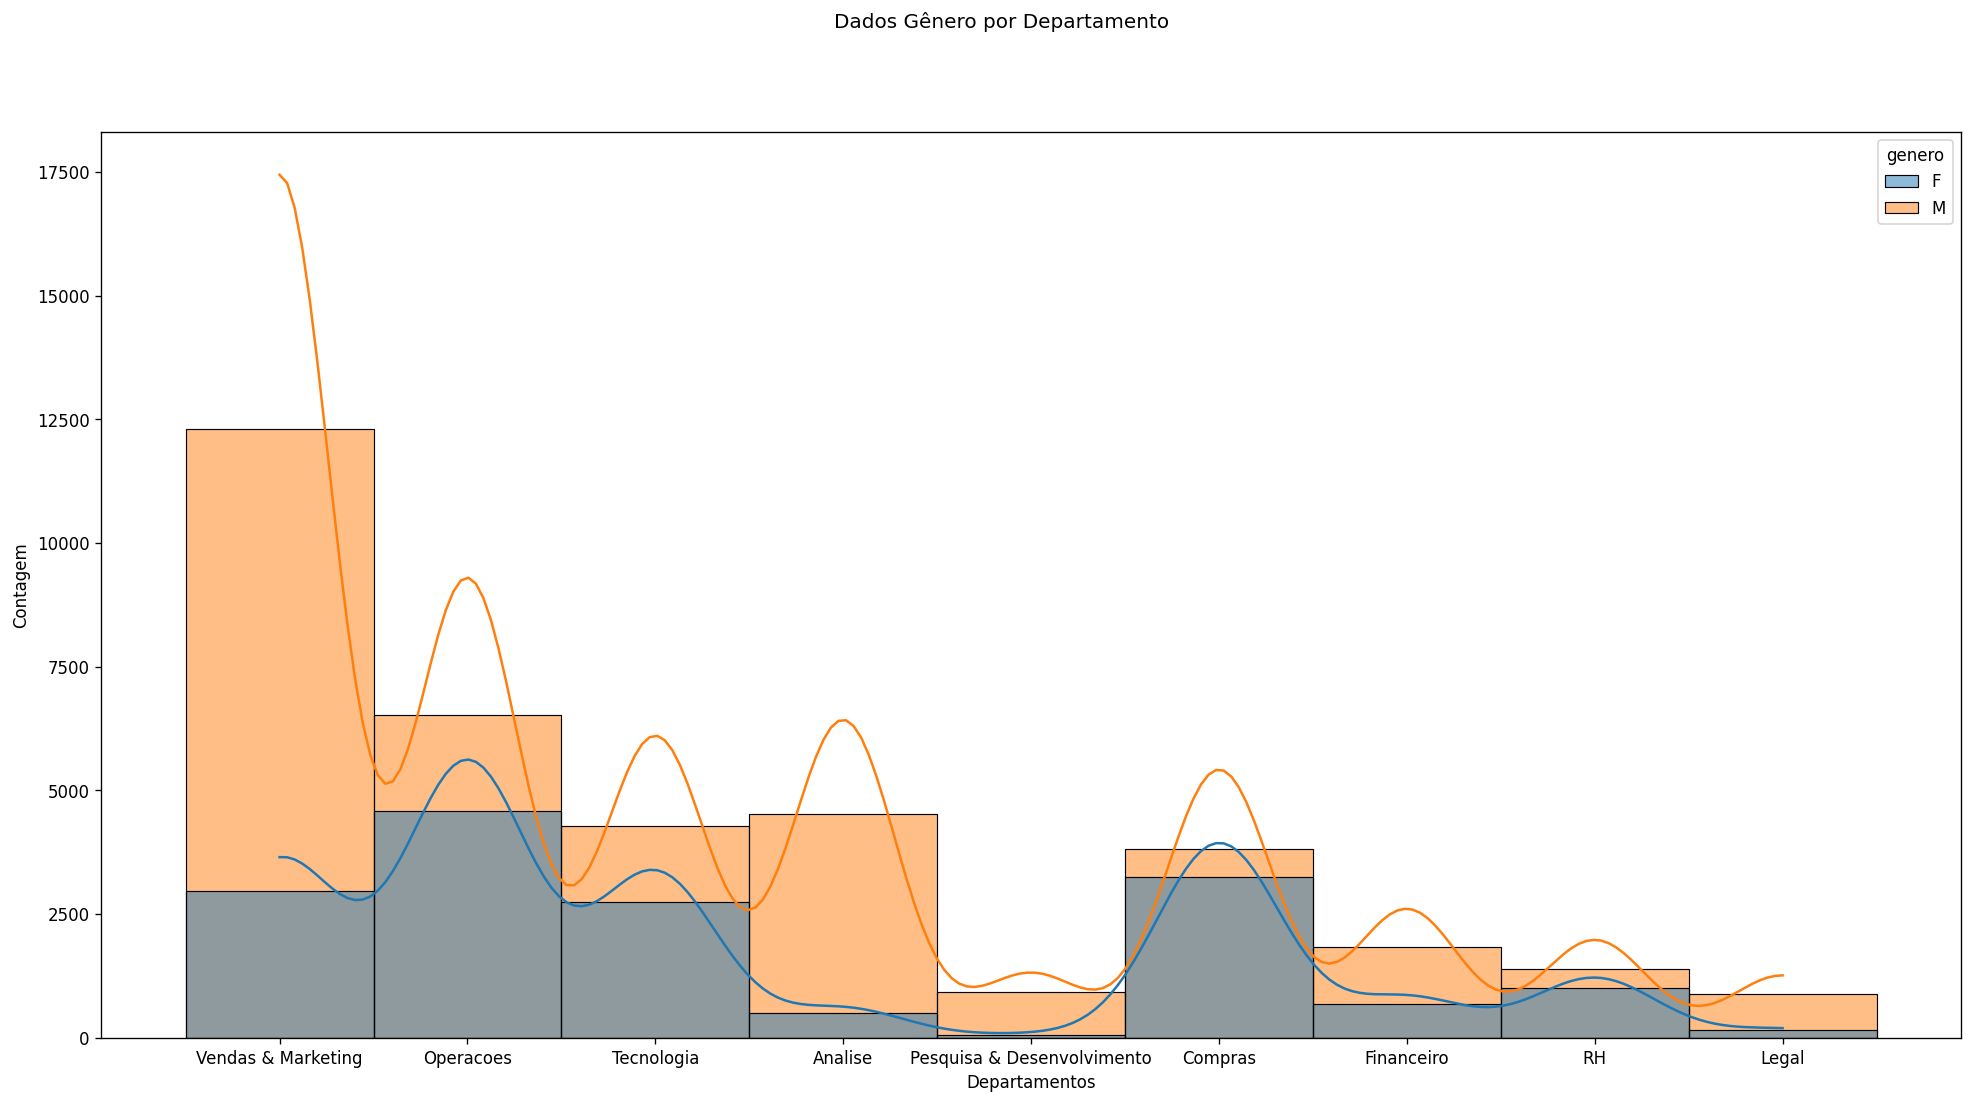

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10), dpi=120)
fig.suptitle('Dados Gênero por Departamento')


sns.histplot(ax=axes,
            data=dados, 
            x='departamento',
            kde=True,
            bins=10,
            linewidth=0.7,
            hue='genero' 
            )

axes.set(xlabel='Departamentos', ylabel='Contagem')


Através deste gráfico pode-se analisar que visivelmente há mais pessoas do gênero masculino do que feminino em todos os departamentos. Em alguns a diferenaça é bem exorbitante, como o de Vendas & Marketing, Análise, Legal e Pesquisa & Desenvolvimento.
Em outros departamentos, apesar de ainda apresentarem diferença, esta é menor, como o de Operações, Compras, Tecnologia e TV.
Portanto a difereça entre o gêneros é evidente, em alguns departamentos é demasiado, enquanto em outros, mais moderado.

[Text(0, 0.5, 'Contagem'), Text(0.5, 0, 'Idade Gênero Masculino')]

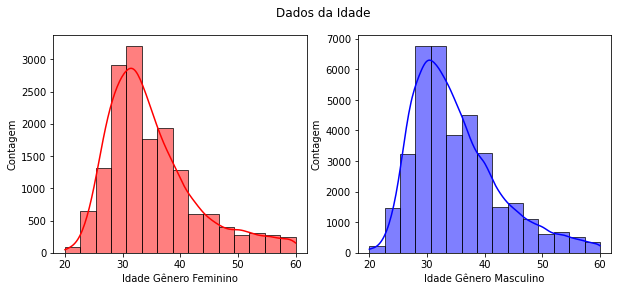

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dados da Idade')


sns.histplot(ax=axes[0],
            data=dados_fem['idade'], 
            kde=True,
            bins=15,
            linewidth=0.7,
            color='red'
            )

sns.histplot(ax=axes[1],
            data=dados_masc['idade'],
            kde=True,
            bins=15,
            linewidth=0.7,
            color='blue'
            )

axes[0].set(xlabel='Idade Gênero Feminino', ylabel='Contagem')
axes[1].set(xlabel='Idade Gênero Masculino', ylabel='Contagem')

Por meio deste gráfico é possível analisar que a idade tanto das pessoas do gênere feminino quanto masculino são muito semelhantes, sendo quase imperceptível as diferenças, informação que condiz com o resultado da média aritmética apresentado anteriomente.
O que se torna perceptível são duas pequenas diferenças: <br/>
1. Na faixa dos 25 aos 30 anos, a quantidade de mulheres tem um considerável aumento enquanto a dos homens se mantém visualmente estável.
2. Na faixa dos 45 aos 50 anos, a quantidade de mulheres se mantém estável enquanto a dos homens tem um pequeno aumento

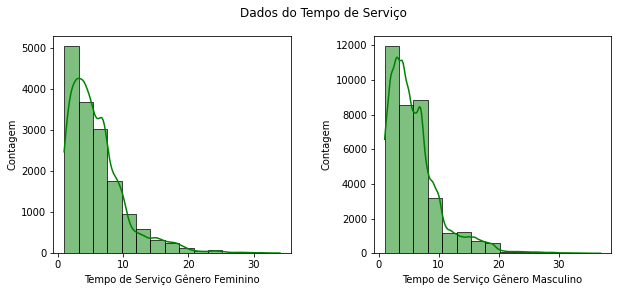

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dados do Tempo de Serviço')


sns.histplot(ax=axes[0],
            data=dados_fem['tempo_de_servico'], 
            kde=True,
            bins=15,
            linewidth=0.7,
            color='green'
            )

sns.histplot(ax=axes[1],
            data=dados_masc['tempo_de_servico'],
            kde=True,
            bins=15,
            linewidth=0.7,
            color='green'
            )

axes[0].set(xlabel='Tempo de Serviço Gênero Feminino', ylabel='Contagem')
axes[1].set(xlabel='Tempo de Serviço Gênero Masculino', ylabel='Contagem')

plt.subplots_adjust(wspace = 0.35)

Este gráfico que nos permite visualizar a cotangem de pessoas do gênero feminino e ao lado do gênero masculino levando em consideração o tempo de serviço em anos. <br/>
Ao analisá-lo, nota-se que em geral ambos se assemelham bastante, porém pode-se apontar uma queda na quantidade de pessoas do gênero feminino entre o terceiro e quinto ano enquanto nos de gênero masculino há um leve aumento, contudo em linhas gerais, o gráfico se mantém bem semelhante, revelando que o tempo de serviço praticamente independe do gênero.

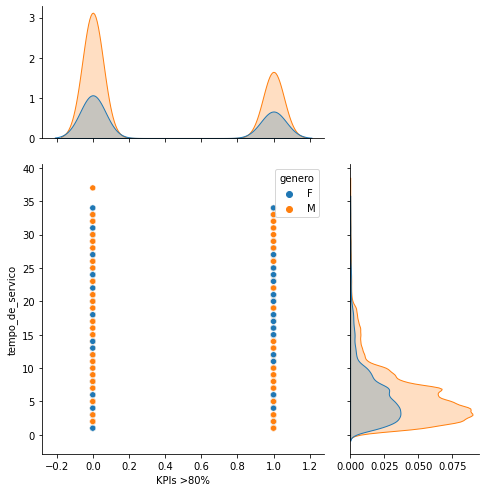

In [24]:
sns.jointplot(data=dados,
              x="KPIs >80%", y="tempo_de_servico",
              height=7, 
              ratio=2,
              marginal_ticks=True,
              hue = 'genero'
             )

Este gráfio traz a tona três informações da tabela, o que nos proporciona muito dados para gerar conhecimento. Primeiramento podemos notar que a quantidade de pessoas que possuem um KPIs acima de 80% são majoritariamente, pessoas do gênero feminino e que, em linhas gerais, o tempo de serviço não tem inteferência direta na quantidade de pessoas que possuem o KPIs acima de 80%.

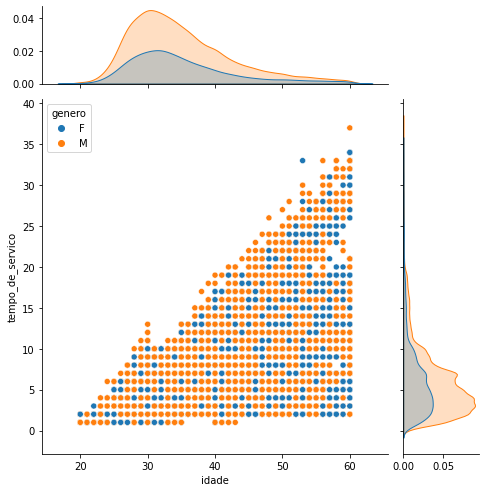

In [25]:
sns.jointplot(data=dados,
              x="idade", y="tempo_de_servico",
              height=7, 
              ratio=4,
              marginal_ticks=True,
              hue = 'genero'
             )

A analise deste gráfico nos permite reconhecer que a quantidade de pessoas do gênero masculino e feminino são bem diferentes uma vez que o gráfico esta visivelmente com mais bolinhas laranjas as quais refenciam o gênero masculino. Entretanto, analisando as idades e gêneros, em linhas gerais, a distribuição de gêneros pelas idades se encontra bem regular e semelhante. Outro dado que pode ser analisado é o fato de terem mais pessoas do gênero feminino em uma faixa etária mais elevado com mais tempo de serviço do que com menos idade e menos tempo de serviço, ou seja, tem poucas pessoas do gênero feminino, porém se encontram um pouco mais concentrado em uma faixa etária mais alta.

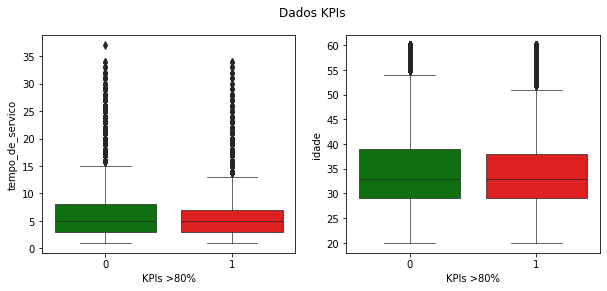

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Dados KPIs')

sns.boxplot(x="KPIs >80%", y="tempo_de_servico",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[0],
            data=dados,
           )

sns.boxplot(x="KPIs >80%", y="idade",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[1],
            data=dados,
           )

Ao analisar este gráfico que faz referência ao KPIs acima de 80% quando comparado com o tempo de serviço e a idade, podemos notar que o tempo de serviço e a idade não geram grandes inteferências quando levado em conta a quan de pessoas que possuem seu KPI acima de 80%. <br/>
Pouco se pode ser ressaltado, como por exemplo o tempo de serviço máximo de pessoas que possuem o KPI acima de 80% é menor que os que não possuem, assim como na idade, pessoas que não possuem tem a idade máxima maior do que os que possuem. <br/>
Portanto o tempo de serviço nem a idade possuem interferências significativas quando se trata de possuir o KPI acima de 80% ou não.